# did_multiplegt_dyn: Cross-Language Comparison

This notebook compares the results and runtime performance of `did_multiplegt_dyn` across:
- **Stata** (original implementation)
- **R** (DIDmultiplegtDYN package)
- **Python** (py-did-multiplegt-dyn package)

## Prerequisites
Before running this notebook, execute the following scripts to generate results:
1. `test_did_multiplegt_dyn_comprehensive.do` (Stata)
2. `test_did_multiplegt_dyn_comprehensive.R` (R)
3. `test_did_multiplegt_dyn_comprehensive.py` (Python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)

# Paths
RESULTS_PATH = Path("/Users/anzony.quisperojas/Documents/GitHub/diff_diff_test/CX")

print("Notebook initialized successfully!")

Notebook initialized successfully!


## 1. Load Runtime Results

In [2]:
# Load runtime results from each platform
runtime_files = {
    'Stata': 'runtime_Stata.csv',
    'R': 'runtime_R.csv',
    'Python': 'runtime_Python.csv'
}

runtime_dfs = {}
for platform, filename in runtime_files.items():
    filepath = RESULTS_PATH / filename
    if filepath.exists():
        runtime_dfs[platform] = pd.read_csv(filepath)
        print(f"Loaded {platform}: {len(runtime_dfs[platform])} tests")
    else:
        print(f"Warning: {filepath} not found")

# Combine all runtime results
if runtime_dfs:
    runtime_all = pd.concat(runtime_dfs.values(), ignore_index=True)
    print(f"\nTotal tests loaded: {len(runtime_all)}")

Loaded Stata: 24 tests
Loaded R: 24 tests
Loaded Python: 24 tests

Total tests loaded: 72


## 2. Runtime Comparison

In [3]:
# Create a pivot table for runtime comparison
if 'runtime_all' in dir():
    runtime_pivot = runtime_all.pivot_table(
        index=['Example', 'Model'],
        columns='Platform',
        values='Runtime_sec',
        aggfunc='mean'
    ).reset_index()
    
    # Reorder columns to have Stata first (as reference)
    cols = ['Example', 'Model']
    for p in ['Stata', 'R', 'Python']:
        if p in runtime_pivot.columns:
            cols.append(p)
    runtime_pivot = runtime_pivot[cols]
    
    print("Runtime Comparison (seconds):")
    print("=" * 80)
    display(runtime_pivot)

Runtime Comparison (seconds):


Platform,Example,Model,Stata,R,Python
0,Deryugina,Baseline,8.945,6.523756,3.592380
1,Favara_Imbs,Baseline,0.812,1.992545,0.373276
2,Gentzkow,Non_Normalized,2.130,1.842004,0.774327
3,Gentzkow,Normalized,2.239,2.333897,0.816470
4,Wagepan,Baseline,0.667,1.203497,0.442032
5,Wagepan,Bootstrap,0.860,0.000179,NaN
6,Wagepan,CI_Level_90,0.844,1.869483,0.466586
7,Wagepan,CI_Level_99,0.851,1.394378,0.460983
8,Wagepan,Cluster,0.886,2.578649,0.571772
9,Wagepan,Continuous,2.557,6.407802,1.689120


In [4]:
# Calculate speedup relative to Stata
if 'runtime_pivot' in dir() and 'Stata' in runtime_pivot.columns:
    speedup_df = runtime_pivot.copy()
    
    for platform in ['R', 'Python']:
        if platform in speedup_df.columns:
            speedup_df[f'{platform}_vs_Stata'] = speedup_df['Stata'] / speedup_df[platform]
    
    print("\nSpeedup relative to Stata (>1 means faster than Stata):")
    print("=" * 80)
    display(speedup_df)


Speedup relative to Stata (>1 means faster than Stata):


Platform,Example,Model,Stata,R,Python,R_vs_Stata,Python_vs_Stata
0,Deryugina,Baseline,8.945,6.523756,3.592380,1.371143,2.489993
1,Favara_Imbs,Baseline,0.812,1.992545,0.373276,0.407519,2.175334
2,Gentzkow,Non_Normalized,2.130,1.842004,0.774327,1.156349,2.750777
3,Gentzkow,Normalized,2.239,2.333897,0.816470,0.959340,2.742293
4,Wagepan,Baseline,0.667,1.203497,0.442032,0.554218,1.508941
5,Wagepan,Bootstrap,0.860,0.000179,NaN,4803.064501,NaN
6,Wagepan,CI_Level_90,0.844,1.869483,0.466586,0.451462,1.808884
7,Wagepan,CI_Level_99,0.851,1.394378,0.460983,0.610308,1.846056
8,Wagepan,Cluster,0.886,2.578649,0.571772,0.343591,1.549568
9,Wagepan,Continuous,2.557,6.407802,1.689120,0.399045,1.513806


In [5]:
# Summary statistics by platform
if 'runtime_all' in dir():
    summary = runtime_all.groupby('Platform')['Runtime_sec'].agg([
        'count', 'sum', 'mean', 'std', 'min', 'max'
    ]).round(4)
    summary.columns = ['N_Tests', 'Total_Time', 'Mean_Time', 'Std_Time', 'Min_Time', 'Max_Time']
    
    print("\nRuntime Summary by Platform:")
    print("=" * 80)
    display(summary)


Runtime Summary by Platform:


,N_Tests,Total_Time,Mean_Time,Std_Time,Min_Time,Max_Time
Platform,,,,,,
Python,23,17.2411,0.7496,0.7192,0.2352,3.5924
R,24,56.0850,2.3369,1.8136,0.0001,6.9911
Stata,24,35.7180,1.4882,1.7160,0.4760,8.9450


## 3. Visualize Runtime Performance

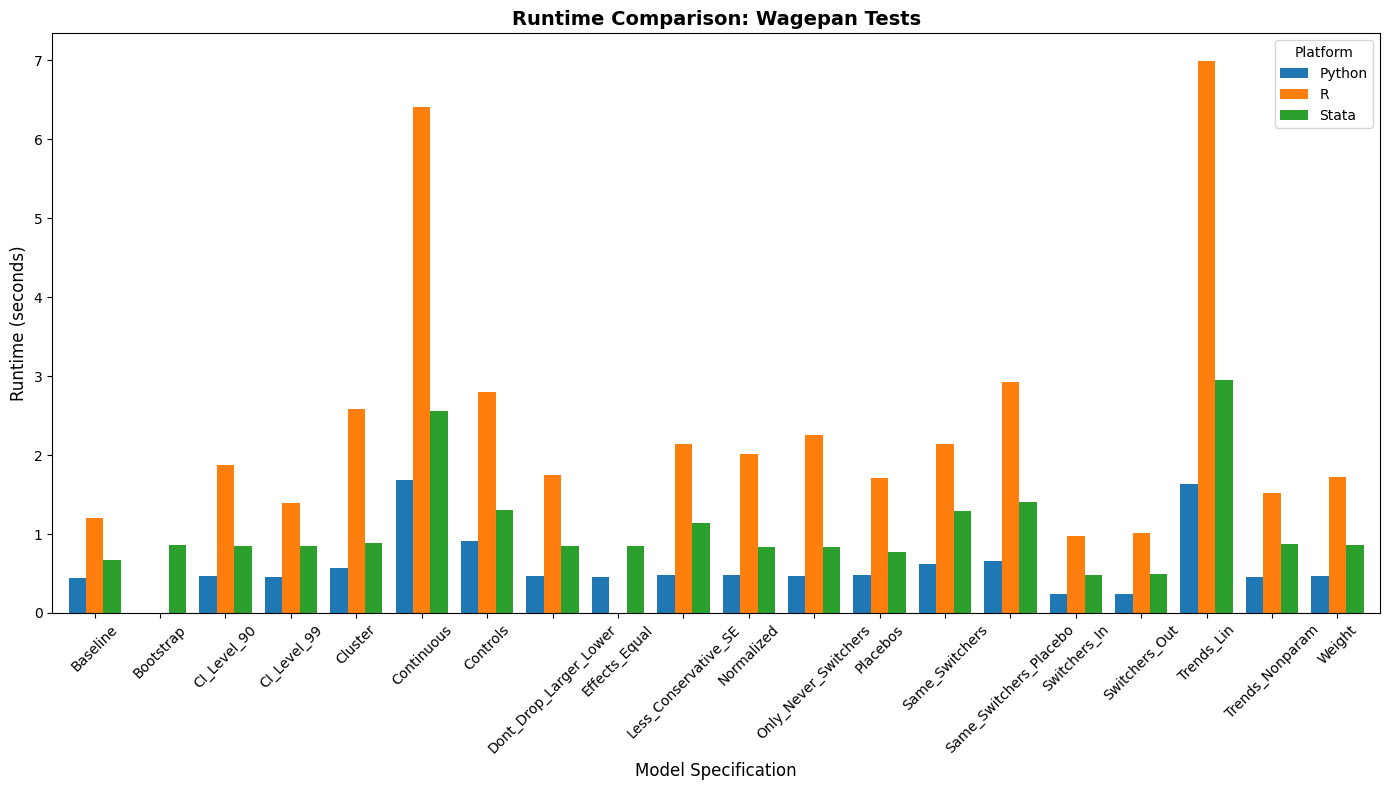


Plot saved to: /Users/anzony.quisperojas/Documents/GitHub/diff_diff_test/CX/runtime_comparison_wagepan.png


In [6]:
# Bar plot of runtime by model and platform
if 'runtime_all' in dir():
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Filter to Wagepan tests only for clearer visualization
    wagepan_runtime = runtime_all[runtime_all['Example'] == 'Wagepan'].copy()
    
    if len(wagepan_runtime) > 0:
        pivot_plot = wagepan_runtime.pivot(index='Model', columns='Platform', values='Runtime_sec')
        pivot_plot.plot(kind='bar', ax=ax, width=0.8)
        
        ax.set_title('Runtime Comparison: Wagepan Tests', fontsize=14, fontweight='bold')
        ax.set_xlabel('Model Specification', fontsize=12)
        ax.set_ylabel('Runtime (seconds)', fontsize=12)
        ax.legend(title='Platform', loc='upper right')
        ax.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.savefig(RESULTS_PATH / 'runtime_comparison_wagepan.png', dpi=150, bbox_inches='tight')
        plt.show()
        print(f"\nPlot saved to: {RESULTS_PATH / 'runtime_comparison_wagepan.png'}")

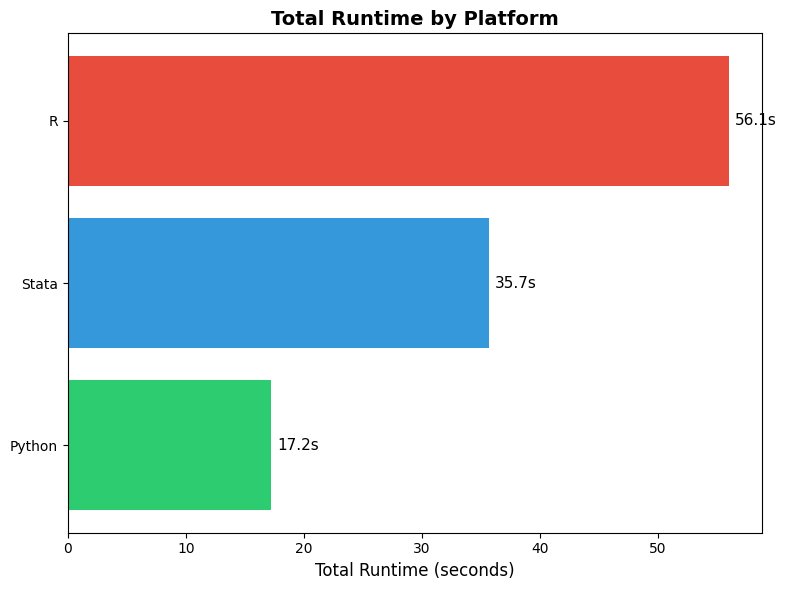

In [7]:
# Total runtime comparison across all tests
if 'runtime_all' in dir():
    fig, ax = plt.subplots(figsize=(8, 6))
    
    total_by_platform = runtime_all.groupby('Platform')['Runtime_sec'].sum().sort_values()
    colors = ['#2ecc71', '#3498db', '#e74c3c'][:len(total_by_platform)]
    
    bars = ax.barh(total_by_platform.index, total_by_platform.values, color=colors)
    
    # Add value labels
    for bar, val in zip(bars, total_by_platform.values):
        ax.text(val + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{val:.1f}s', va='center', fontsize=11)
    
    ax.set_title('Total Runtime by Platform', fontsize=14, fontweight='bold')
    ax.set_xlabel('Total Runtime (seconds)', fontsize=12)
    
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / 'total_runtime_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()

## 4. Load and Compare Coefficients

In [8]:
# Load coefficient results from each platform
coef_files = {
    'Stata': 'coefficients_Stata.csv',
    'R': 'coefficients_R.csv',
    'Python': 'coefficients_Python.csv'
}

coef_dfs = {}
for platform, filename in coef_files.items():
    filepath = RESULTS_PATH / filename
    if filepath.exists():
        coef_dfs[platform] = pd.read_csv(filepath)
        coef_dfs[platform]['Platform'] = platform
        print(f"Loaded {platform}: {len(coef_dfs[platform])} coefficients")
    else:
        print(f"Warning: {filepath} not found")

# Combine all coefficient results
if coef_dfs:
    coef_all = pd.concat(coef_dfs.values(), ignore_index=True)
    print(f"\nTotal coefficients loaded: {len(coef_all)}")

Loaded Stata: 207 coefficients
Loaded R: 170 coefficients
Loaded Python: 170 coefficients

Total coefficients loaded: 547


In [9]:
# Create pivot table for coefficient comparison
if 'coef_all' in dir():
    coef_pivot = coef_all.pivot_table(
        index=['Example', 'Model', 'Type', 'Index'],
        columns='Platform',
        values='Estimate',
        aggfunc='mean'
    ).reset_index()
    
    print("\nCoefficient Comparison (Estimates):")
    print("=" * 80)
    display(coef_pivot.head(30))


Coefficient Comparison (Estimates):


Platform,Example,Model,Type,Index,Python,R,Stata
0,Deryugina,Baseline,Avg_Effect,0,NaN,NaN,0.319072
1,Deryugina,Baseline,Effect,1,0.010863,0.010863,0.010863
2,Deryugina,Baseline,Effect,2,0.012792,0.012792,0.012792
3,Deryugina,Baseline,Effect,3,0.015800,0.015800,0.015800
4,Deryugina,Baseline,Effect,4,0.016389,0.016389,0.016389
5,Deryugina,Baseline,Effect,5,0.023070,0.023070,0.023070
6,Deryugina,Baseline,Effect,6,0.026829,0.026829,0.026829
7,Deryugina,Baseline,Effect,7,0.037715,0.037715,0.037715
8,Deryugina,Baseline,Effect,8,0.039292,0.039292,0.039292
9,Deryugina,Baseline,Effect,9,0.035109,0.035109,0.035109


In [15]:
coef_pivot = coef_pivot.loc[ coef_pivot['Type'] != 'Avg_Effect', : ].copy()

In [20]:
# Calculate differences between platforms
if 'coef_pivot' in dir():
    diff_df = coef_pivot.copy()
    
    # Calculate differences relative to Stata
    if 'Stata' in diff_df.columns:
        for platform in ['R', 'Python']:
            if platform in diff_df.columns:
                diff_df[f'{platform}_diff'] = diff_df[platform] - diff_df['Stata']
                diff_df[f'{platform}_pct_diff'] = ((diff_df[platform] - diff_df['Stata']) / diff_df['Stata'].abs()) * 100
    
    print("\nDifferences relative to Stata:")
    print("=" * 80)
    
    # Show summary of differences
    diff_cols = [c for c in diff_df.columns if '_diff' in c and '_pct_diff' not in c]
    if diff_cols:
        print("\nAbsolute differences summary:")
        for col in diff_cols:
            print(f"\n{col}:")
            print(f"  Mean: {diff_df[col].mean():.10f}")
            print(f"  Max:  {diff_df[col].abs().max():.10f}")
            print(f"  Std:  {diff_df[col].std():.10f}")


Differences relative to Stata:

Absolute differences summary:

R_diff:
  Mean: 0.0000000015
  Max:  0.0000000178
  Std:  0.0000000047

Python_diff:
  Mean: 0.0000000023
  Max:  0.0000000162
  Std:  0.0000000044


## 5. Estimate Comparison Visualization

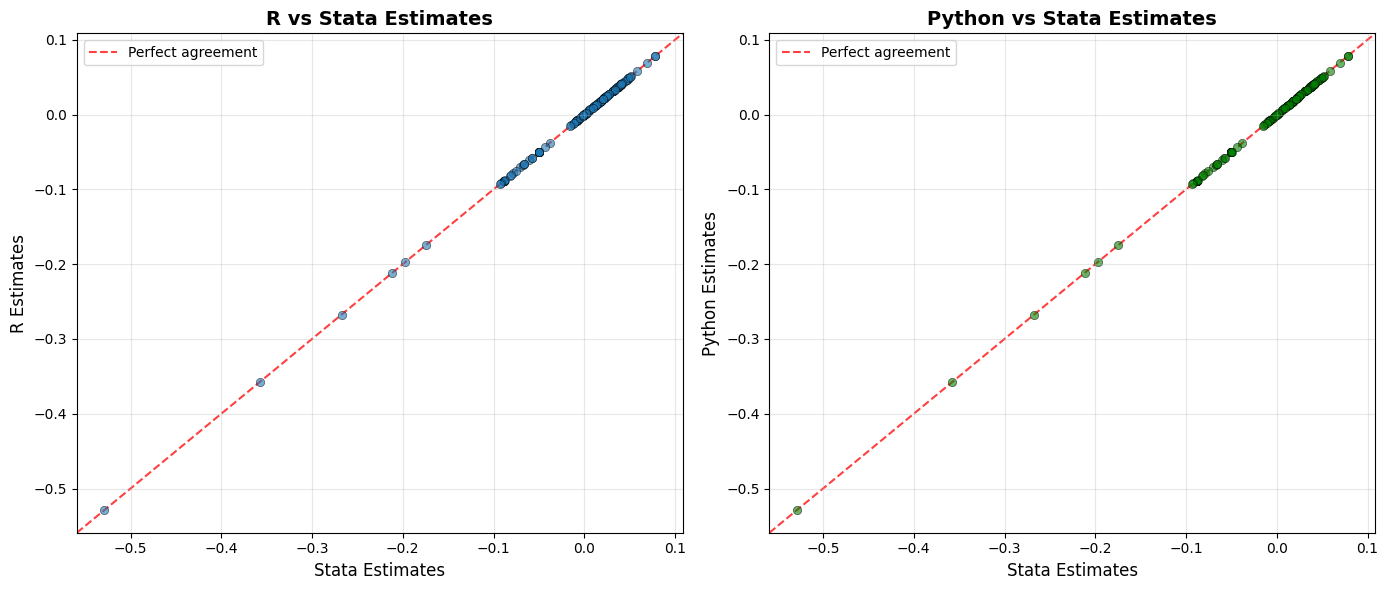

In [17]:
# Scatter plot: R vs Stata estimates
if 'coef_pivot' in dir() and 'Stata' in coef_pivot.columns and 'R' in coef_pivot.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # R vs Stata
    ax = axes[0]
    valid_data = coef_pivot.dropna(subset=['Stata', 'R'])
    ax.scatter(valid_data['Stata'], valid_data['R'], alpha=0.6, edgecolors='k', linewidth=0.5)
    
    # Add 45-degree line
    lims = [min(ax.get_xlim()[0], ax.get_ylim()[0]), max(ax.get_xlim()[1], ax.get_ylim()[1])]
    ax.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Perfect agreement')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    ax.set_xlabel('Stata Estimates', fontsize=12)
    ax.set_ylabel('R Estimates', fontsize=12)
    ax.set_title('R vs Stata Estimates', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Python vs Stata (if available)
    ax = axes[1]
    if 'Python' in coef_pivot.columns:
        valid_data = coef_pivot.dropna(subset=['Stata', 'Python'])
        ax.scatter(valid_data['Stata'], valid_data['Python'], alpha=0.6, edgecolors='k', linewidth=0.5, color='green')
        
        lims = [min(ax.get_xlim()[0], ax.get_ylim()[0]), max(ax.get_xlim()[1], ax.get_ylim()[1])]
        ax.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Perfect agreement')
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        
        ax.set_xlabel('Stata Estimates', fontsize=12)
        ax.set_ylabel('Python Estimates', fontsize=12)
        ax.set_title('Python vs Stata Estimates', fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
    else:
        ax.text(0.5, 0.5, 'Python data not available', ha='center', va='center', transform=ax.transAxes)
    
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / 'estimate_comparison_scatter.png', dpi=150, bbox_inches='tight')
    plt.show()